In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
## Loading the dataset from csv file

df = pd.read_csv('data\StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [8]:
## Check for missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

### Observation1 :There are no Missing Values

In [11]:
## Check for duplicate rows
df.duplicated().sum()

0

### Observation2 : There are no duplicate rows in the dataset

In [14]:
## check for unique values 
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [15]:
## Get the Numerical columns and Categorical columns
num_cols = [col for col in df.columns if df[col].dtype != 'O']
cat_cols = [col for col in df.columns if df[col].dtype =='O']

print('Numerical columns:', num_cols)
print('Categorical columns:',cat_cols)


Numerical columns: ['math score', 'reading score', 'writing score']
Categorical columns: ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


In [16]:
## To get the unique values in each categorical coulmn
for col in cat_cols : 
    print(f'Unique values in {col}:{df[col].unique()}')

Unique values in gender:['female' 'male']
Unique values in race/ethnicity:['group B' 'group C' 'group A' 'group D' 'group E']
Unique values in parental level of education:["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Unique values in lunch:['standard' 'free/reduced']
Unique values in test preparation course:['none' 'completed']


In [17]:
## Statstical summary of numerical columns
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


In [18]:
df['Total_Score'] =df['math score'] +df['reading score'] +df['writing score']
df['Average_Score'] =df['Total_Score']/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total_Score,Average_Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.666667
1,female,group C,some college,standard,completed,69,90,88,247,82.333333
2,female,group B,master's degree,standard,none,90,95,93,278,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.333333
4,male,group C,some college,standard,none,76,78,75,229,76.333333


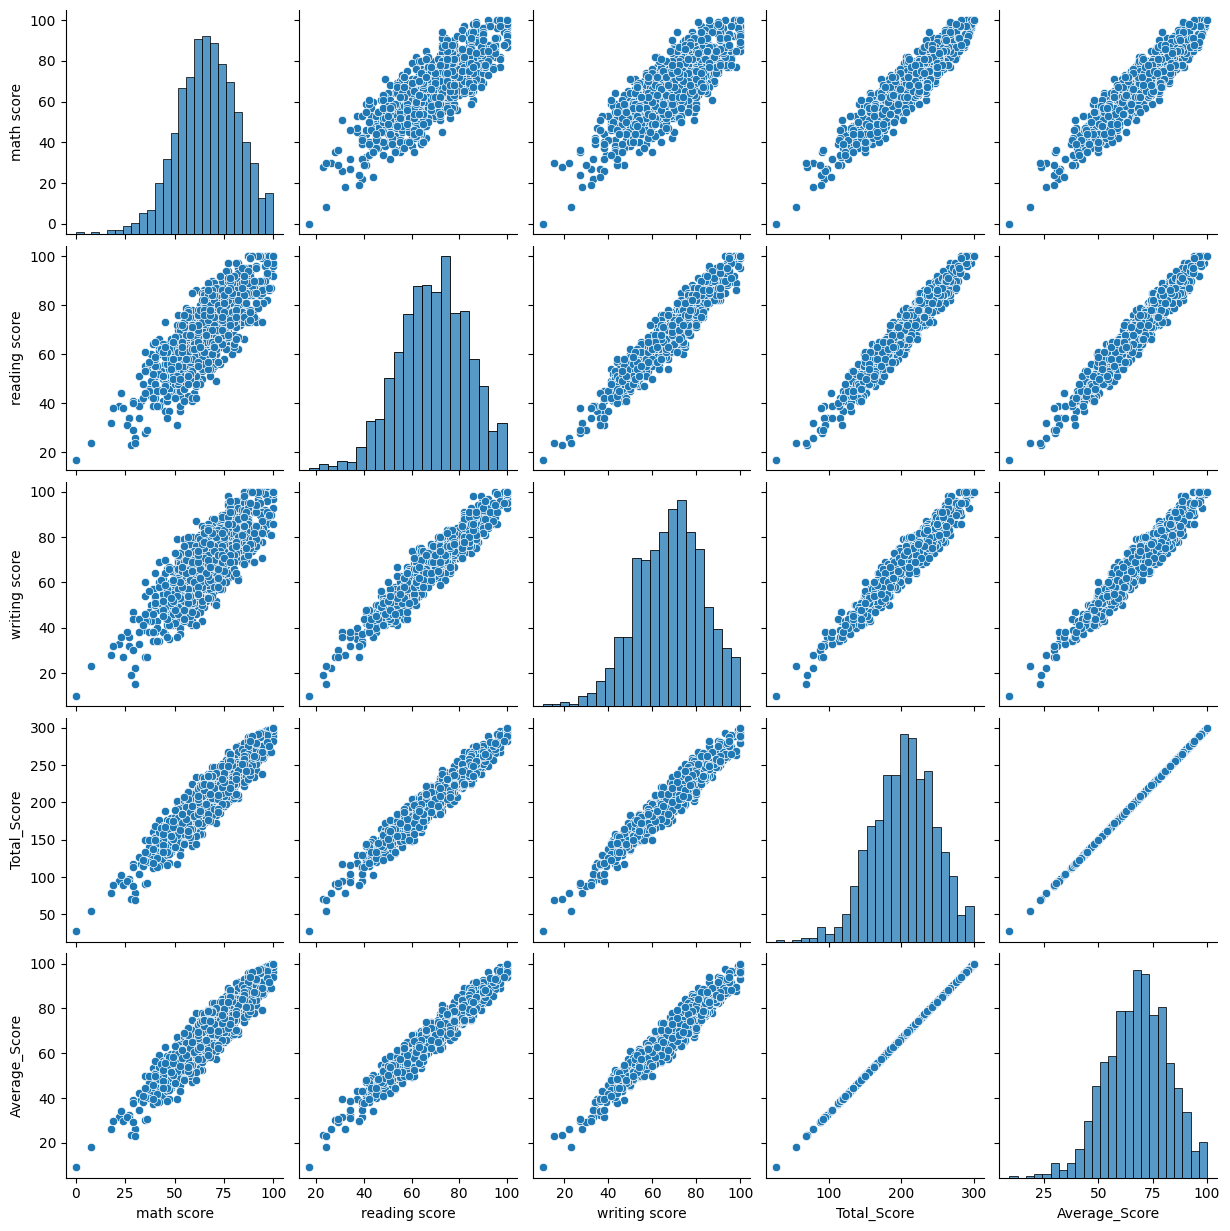

In [19]:
sns.pairplot(df)

In [29]:
print('Number of students with full score in math:', df[df['math score'] == 100]['Total_Score'].count() )
print('Number of students with full score in reading:', df[df['reading score'] == 100]['Total_Score'].count() )
print('Number of students with full score in writing:', df[df['writing score'] == 100]['Total_Score'].count() )

Number of students with full score in math: 7
Number of students with full score in reading: 17
Number of students with full score in writing: 14


<Axes: xlabel='Average_Score', ylabel='Count'>

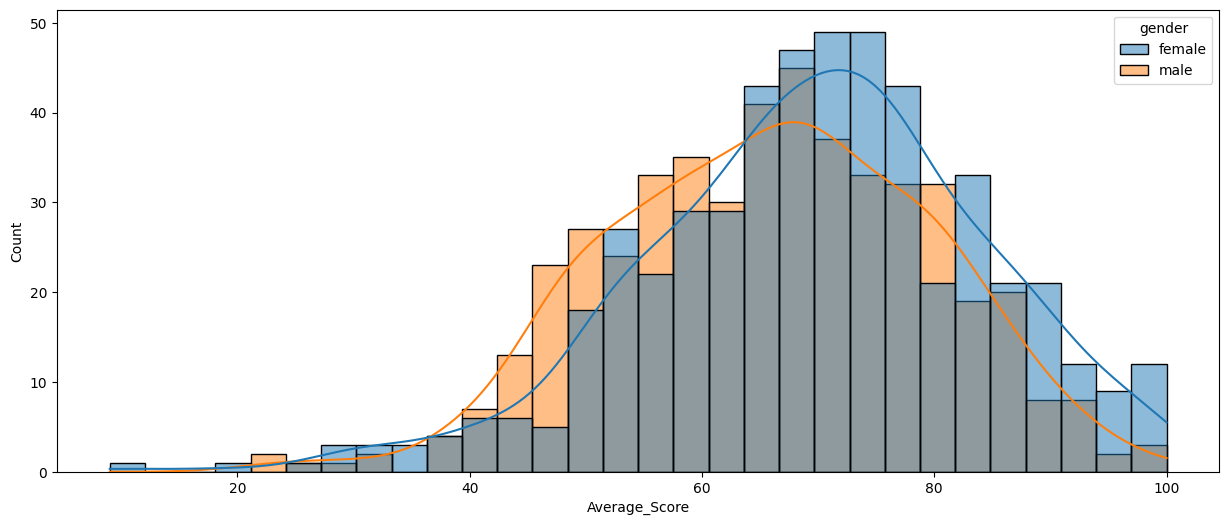

In [31]:
plt.figure(figsize=(15,6))
sns.histplot(df,x=df['Average_Score'],bins=30,kde=True,hue='gender')

<Axes: xlabel='Total_Score', ylabel='Count'>

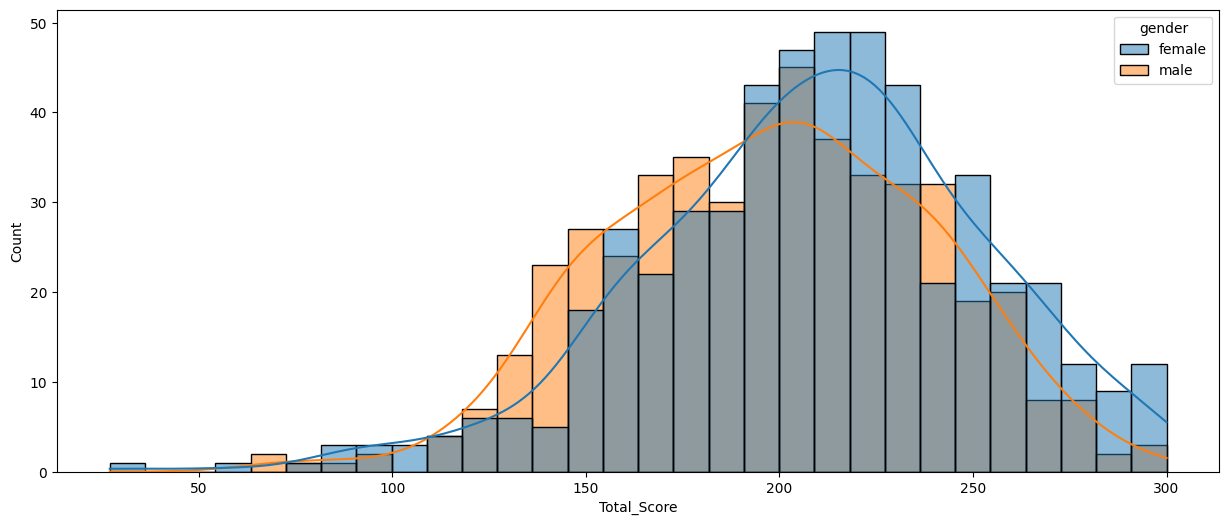

In [32]:
plt.figure(figsize=(15,6))
sns.histplot(df,x=df['Total_Score'],bins=30,kde=True,hue='gender')

<Axes: >

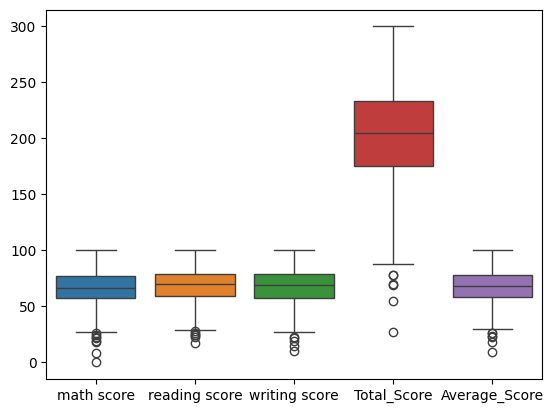

In [37]:
sns.boxplot(df)